Forecast product sales using machine learning based on historical sales data.
• Analyze different factors like advertising spend, promotions, customer segmentation etc.
• Handle missing values, detect outliers, and apply feature scaling for better results.
• Evaluate the model using appropriate analysis techniques.
• Expected outcome: A model that helps businesses optimize marketing strategies for sales growth.
• Submit a well-structured GitHub repository with clear documentation on approach and methodology.

<ipython-input-5-37ceb67d0f68>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["gender"], palette=["blue", "red"])


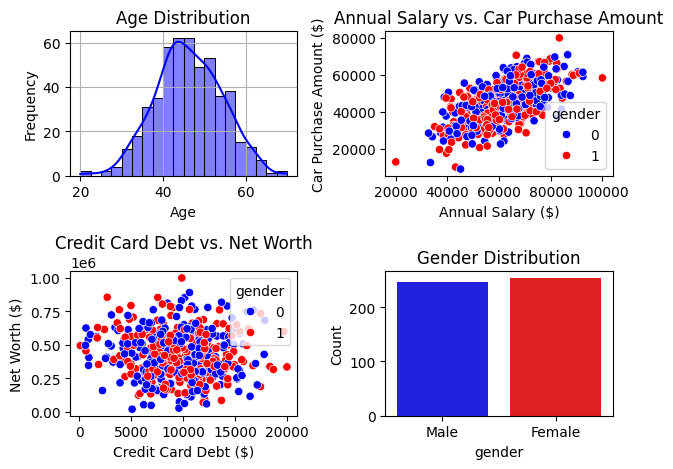

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.8991 - mae: 0.7557 - val_loss: 0.5807 - val_mae: 0.6132
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6770 - mae: 0.6555 - val_loss: 0.3917 - val_mae: 0.4917
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5420 - mae: 0.5636 - val_loss: 0.2115 - val_mae: 0.3418
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3250 - mae: 0.4291 - val_loss: 0.0936 - val_mae: 0.2183
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2649 - mae: 0.3858 - val_loss: 0.0521 - val_mae: 0.1726
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1600 - mae: 0.3010 - val_loss: 0.0342 - val_mae: 0.1395
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1482 - mae: 0.2860 - val_loss: 0.0238 - val_mae: 0.1163
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1369 - mae: 0.2834 - val_loss: 0.0239 - val_mae: 0.1133
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0

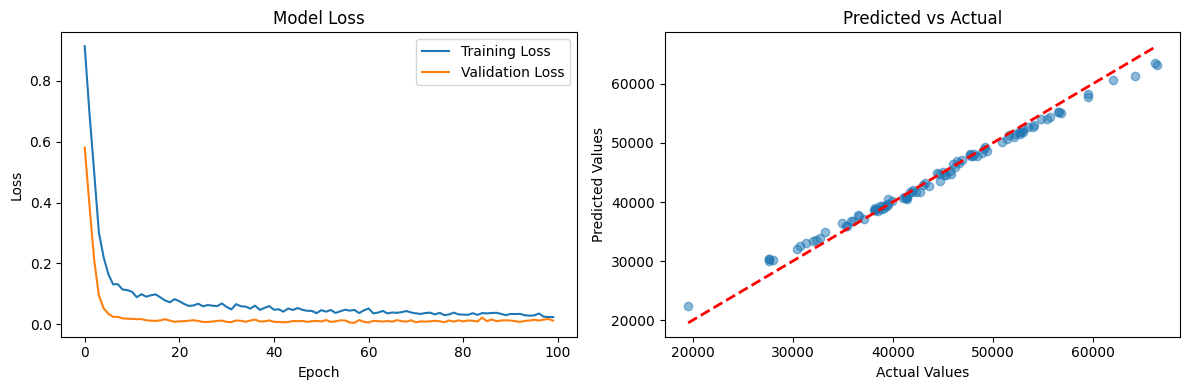

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/drive/MyDrive/car_purchasing.csv',encoding='ISO-8859-1')
df.columns
#DATA VISUALIZATIONS
# Plot 1: Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df["age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
# It helps understand the age range of customers purchasing cars.

# Plot 2: Annual Salary vs. Car Purchase Amount
plt.subplot(2, 2, 2)
sns.scatterplot(x=df["annual Salary"], y=df["car purchase amount"], hue=df["gender"], palette={0: "blue", 1: "red"})
plt.title("Annual Salary vs. Car Purchase Amount")
plt.xlabel("Annual Salary ($)")
plt.ylabel("Car Purchase Amount ($)")
# It helps analyze how income influences car purchases and if there are gender-based spending trends.

# Plot 3: Credit Card Debt vs. Net Worth
plt.subplot(2, 2, 3)
sns.scatterplot(x=df["credit card debt"], y=df["net worth"], hue=df["gender"], palette={0: "blue", 1: "red"})
plt.title("Credit Card Debt vs. Net Worth")
plt.xlabel("Credit Card Debt ($)")
plt.ylabel("Net Worth ($)")
# It helps observe whether individuals with higher net worth tend to have more or less debt.

# Plot 4: Gender Distribution
plt.subplot(2, 2, 4)
sns.countplot(x=df["gender"], palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.title("Gender Distribution")
plt.ylabel("Count")
# It shows the proportion of male and female customers.

plt.tight_layout()
plt.show()

# Data Preprocessing
# Handle missing values
df = df.dropna()

# Encode categorical variables
le_country = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])

# Feature engineering
df['debt_to_salary_ratio'] = df['credit card debt'] / df['annual Salary']
df['net_worth_to_salary'] = df['net worth'] / df['annual Salary']

# Detect and handle outliers using IQR method
for col in ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Define features and target
X = df[['gender', 'age', 'annual Salary', 'credit card debt',
        'net worth', 'country', 'debt_to_salary_ratio', 'net_worth_to_salary']]
y = df['car purchase amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Build ANN Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train_scaled,
                   validation_data=(X_test_scaled, y_test_scaled),
                   epochs=100,
                   batch_size=32,
                   verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Visualization
# Training history plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Predicted vs Actual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.savefig('model_performance.png')

# R² = 0.98 means your model captures almost all patterns in the data.